In [8]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator
import glob
import tensorflow as tf

import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
rnd = np.random.RandomState(0)
num_classes = 4

# Initialize conditioning
conditioning = np.eye(num_classes)

In [3]:
# Initialize TensorFlow
tflib.init_tf()
dir = 'results/vm/landscapes'
fn = 'network-snapshot-006126.pkl'
_G, _D, Gs = pickle.load(open(os.path.join(dir,fn), 'rb'))





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
filenames = sorted(glob.glob(("latent_representations\\landscapes\\*")))

In [17]:
latent = np.load(filenames[0])
latent.shape

(16, 512)

In [56]:
def generate_image(latents):
    c = np.tile(conditioning[3],(16,1))
    images = Gs.run(latents, c, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
    plt.figure(1, figsize=(30,3))
    for im  in range(10):
        plt.subplot(1,10,im+1)
        img = PIL.Image.fromarray(images[im], 'RGB')
        plt.imshow(img,interpolation='bicubic')   
        plt.axis('off')
    plt.show()

latent_representations\landscapes\1000.npy


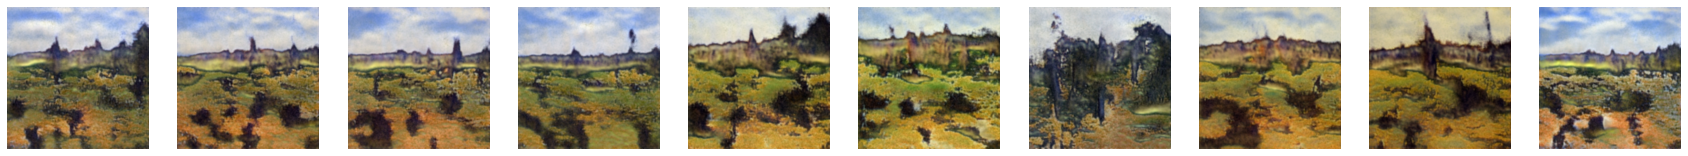

latent_representations\landscapes\12679.npy


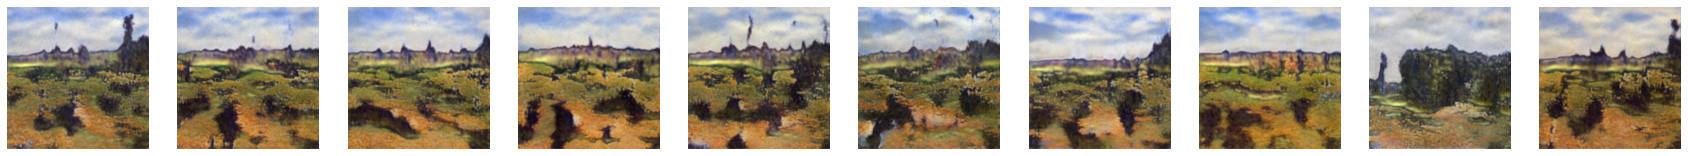

latent_representations\landscapes\18143.npy


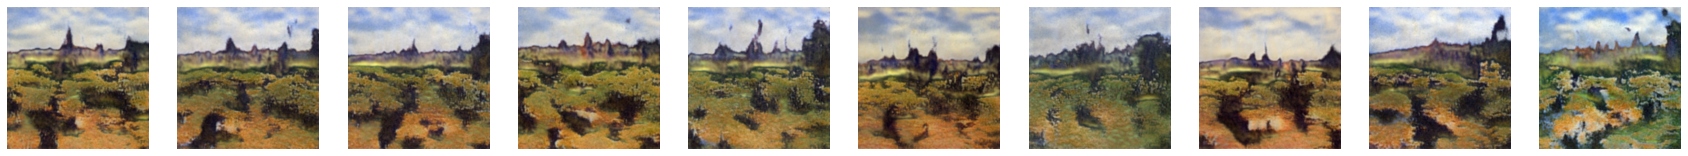

latent_representations\landscapes\283.npy


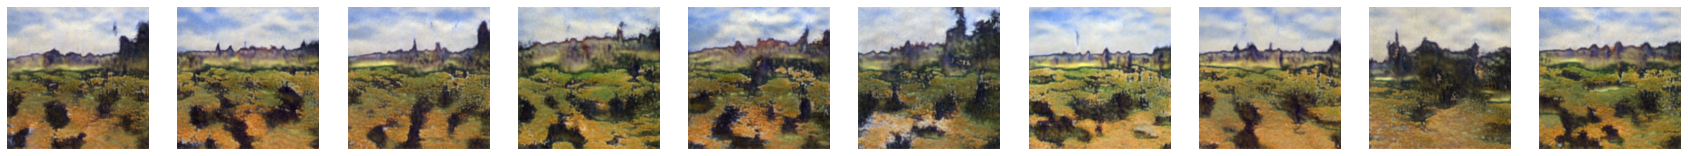

latent_representations\landscapes\3787.npy


KeyboardInterrupt: 

In [57]:
for file in filenames:
    print(file)
    latent = np.load(file)
    generate_image(latent)

In [14]:
x = Gs.components.synthesis.run( np.zeros((1, 512)), 
                                randomize_noise=False, 
                                minibatch_size=10,
                                structure='fixed')

InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: In[0] is not a matrix. Instead it has shape [1]
	 [[node G_synthesis_1/_Run/G_synthesis/16x16/Conv0_up/StyleMod/MatMul (defined at <string>:159) ]]
	 [[G_synthesis_1/_Run/G_synthesis/images_out/_1263]]
  (1) Invalid argument: In[0] is not a matrix. Instead it has shape [1]
	 [[node G_synthesis_1/_Run/G_synthesis/16x16/Conv0_up/StyleMod/MatMul (defined at <string>:159) ]]
0 successful operations.
0 derived errors ignored.

Errors may have originated from an input operation.
Input Source operations connected to node G_synthesis_1/_Run/G_synthesis/16x16/Conv0_up/StyleMod/MatMul:
 G_synthesis_1/_Run/G_synthesis/16x16/Conv0_up/StyleMod/mul (defined at <string>:149)	
 G_synthesis_1/_Run/G_synthesis/16x16/Conv0_up/strided_slice (defined at <string>:500)

Input Source operations connected to node G_synthesis_1/_Run/G_synthesis/16x16/Conv0_up/StyleMod/MatMul:
 G_synthesis_1/_Run/G_synthesis/16x16/Conv0_up/StyleMod/mul (defined at <string>:149)	
 G_synthesis_1/_Run/G_synthesis/16x16/Conv0_up/strided_slice (defined at <string>:500)

Original stack trace for 'G_synthesis_1/_Run/G_synthesis/16x16/Conv0_up/StyleMod/MatMul':
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-b7c794a163ef>", line 1, in <module>
    x = Gs.components.synthesis.run( np.zeros((10, 512)), randomize_noise=False, minibatch_size=10,structure='fixed')
  File "C:\Users\olivi\Documents\COMP4906\stylegan\dnnlib\tflib\network.py", line 455, in run
    out_gpu = net_gpu.get_output_for(*in_gpu, return_as_list=True, **dynamic_kwargs)
  File "C:\Users\olivi\Documents\COMP4906\stylegan\dnnlib\tflib\network.py", line 222, in get_output_for
    out_expr = self._build_func(*final_inputs, **build_kwargs)
  File "<string>", line 532, in G_synthesis
  File "<string>", line 520, in block
  File "<string>", line 500, in layer_epilogue
  File "<string>", line 263, in style_mod
  File "<string>", line 159, in dense
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\ops\math_ops.py", line 2647, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 6295, in mat_mul
    name=name)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [18]:
from encoder.generator_model import Generator


In [22]:
generator = Generator(Gs, 1, clipping_threshold=2.0, tiled_dlatent=False, model_res=512,
                      randomize_noise=False)


StopIteration: 